# **Sistema de recomendação de músicas**

-----------------
### **Contexto**
Com o advento da tecnologia, as sociedades tornaram-se mais eficientes nas suas vidas. Ao mesmo tempo, as vidas individualizadas tornaram-se muito mais aceleradas e distraídas, deixando pouco tempo para explorar atividades artísticas. Além disso, a tecnologia fez avanços significativos na capacidade de coexistir com arte e entretenimento em geral. Tornou mais fácil para os humanos com falta de tempo encontrar e consumir um bom conteúdo. Portanto, um dos principais desafios para as empresas é conseguir descobrir que tipo de conteúdo seus clientes estão mais propensos a consumir. A receita de quase todas as empresas que operam online depende do tempo que os consumidores passam em suas plataformas. Essas empresas precisam ser capazes de descobrir que tipo de conteúdo é necessário expor para aumentar o tempo gasto pelos clientes em sua plataforma e tornar sua experiência melhor.
O Spotify é um desses provedores de conteúdo de áudio que possui um forte mercado em todo o mundo. Ele cresceu significativamente devido à sua capacidade de recomendar a "melhor" próxima música para cada cliente com base no enorme banco de dados de preferências que eles reuniram ao longo do tempo, como milhões de clientes e bilhões de músicas. Isso é feito usando sistemas de recomendação inteligentes que podem recomendar músicas com base no que os usuários gostam ou não.

------------------
### **Objetivo**
Recomendar músicas a um usuário com base na probabilidade de gostar dessas músicas.

------------------------
### **As perguntas-chave**
- Quais são todas as músicas que eles ouviram?
- Quais são as músicas e artistas favoritos?

------------------------
### **Formulação do problema**

Crie um sistema de recomendação para propor as 10 melhores músicas para um usuário com base na probabilidade de ouvir essas músicas.

-------------------------
### **Dicionário de Dados**

Os dados principais são o subconjunto de perfis de sabor lançado pelo The Echo Nest como parte do conjunto de dados de milhões de músicas. Há dois arquivos neste conjunto de dados. Um contém os detalhes sobre o id da música, títulos, lançamento, nome do artista e o ano de lançamento. O segundo arquivo contém o ID do usuário, o ID da música e o play_count dos usuários.

####**song_data**
**song_id** - Um id único dado a cada música

**title** - Título da música

**Release** - Nome do álbum lançado

**Artist_name** - Nome do artista

**ano** - Ano de lançamento

####**count_data**
**user_id** - Um id exclusivo dado ao usuário

**song_id** - Um id único dado à música

**play_count** - Número de vezes que a música foi tocada

---------------------
###**Fonte de Dados**
- http://millionsongdataset.com/

Às vezes, a instalação da biblioteca surpresa, usada para criar sistemas de recomendação, enfrenta problemas no Jupyter. Para evitar problemas, é recomendável usar o **Google Colab** para este projeto.

Vamos começar montando o Google drive no Colab.

In [1]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Instalando biblioteca surpresa**

In [2]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.8 MB 4.9 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1633984 sha256=8f6ae709b82322f1f0301952f0269787e4e651a00db478c3cde4aeaf7b769f1d
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


## **Importando as bibliotecas necessárias e visão geral do conjunto de dados**

In [3]:
import warnings                                 # Used to ignore the warning given as output of the code
warnings.filterwarnings('ignore')

import numpy as np                              # Basic libraries of python for numeric and dataframe computations
import pandas as pd

import matplotlib.pyplot as plt                 # Basic library for data visualization
import seaborn as sns                           # Slightly advanced library for data visualization

from collections import defaultdict             # A dictionary output that does not raise a key error

from sklearn.metrics import mean_squared_error  # A performance metrics in sklearn

### **Carregando os dados**

In [4]:
#Use the cell while using Colab
count_df = pd.read_csv('/content/drive/MyDrive/count_data.csv')
song_df = pd.read_csv('/content/drive/MyDrive/song_data.csv')

In [5]:
# # Importing the datasets
# count_df = pd.read_csv('count_data.csv')
# song_df = pd.read_csv('song_data.csv')

**Agora, vamos ver os dez principais registros dos dados.**

In [6]:
# head() is a method used to display the first n records of a dataframe, by default n=5.
count_df.head(10)

,Unnamed: 0,user_id,song_id,play_count
0,0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [7]:
song_df.head(10)

,song_id,title,release,artist_name,year
0,SOQMMHC12AB0180CB8,Silent Night,Monster Ballads X-Mas,Faster Pussy cat,2003
1,SOVFVAK12A8C1350D9,Tanssi vaan,Karkuteillä,Karkkiautomaatti,1995
2,SOGTUKN12AB017F4F1,No One Could Ever,Butter,Hudson Mohawke,2006
3,SOBNYVR12A8C13558C,Si Vos Querés,De Culo,Yerba Brava,2003
4,SOHSBXH12A8C13B0DF,Tangle Of Aspens,Rene Ablaze Presents Winter Sessions,Der Mystic,0
5,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",Berwald: Symphonies Nos. 1/2/3/4,David Montgomery,0
6,SOQVRHI12A6D4FB2D7,We Have Got Love,Strictly The Best Vol. 34,Sasha / Turbulence,0
7,SOEYRFT12AB018936C,2 Da Beat Ch'yall,Da Bomb,Kris Kross,1993
8,SOPMIYT12A6D4F851E,Goodbye,Danny Boy,Joseph Locke,0
9,SOJCFMH12A8C13B0C2,Mama_ mama can't you see ?,March to cadence with the US marines,The Sun Harbor's Chorus-Documentary Recordings,0


**Vamos verificar os tipos de dados e valores ausentes de cada coluna**

In [8]:
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     object
 2   song_id     object
 3   play_count  int64 
dtypes: int64(2), object(2)
memory usage: 61.0+ MB


In [9]:
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999985 non-null   object
 2   release      999995 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


**Observações**:
- O dataframe **count_df** contém **user_id, song_id,** e o **número de vezes que uma determinada música foi tocada por um determinado usuário**. Existem **4 colunas** e **20,000,000 observações** no conjunto de dados.
- A coluna **unnamed: 0** parece ser o índice do dataframe. Podemos descartar esta coluna.
- Os dados song_df contém informações/características da música - **título**, **álbum lançado**, **nome do artista**,**ano de lançamento**. Existem **5 colunas** e **10,000,000 observações** no conjunto de dados.

In [10]:
# Joining/merging the count_df anf song_df to better understand the user prefrences
df = pd.merge(count_df, song_df.drop_duplicates(['song_id']), on="song_id", how="left")
df = df.drop(['Unnamed: 0'],axis=1)
df

,user_id,song_id,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999
...,...,...,...,...,...,...,...
1999995,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJEYPO12AAA8C6B0E,2,Ignorance (Album Version),Ignorance,Paramore,0
1999996,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJJYDE12AF729FC16,4,Two Is Better Than One,Love Drunk,Boys Like Girls featuring Taylor Swift,2009
1999997,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJKQSF12A6D4F5EE9,3,What I've Done (Album Version),What I've Done,Linkin Park,2007
1999998,d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92,SOJUXGA12AC961885C,1,Up,My Worlds,Justin Bieber,2010


Aqui as colunas **song_id** e **user_id** são criptografadas para fornecer anonimato. Para facilitar nosso processamento do conjunto de dados, usaremos codificações de rótulo para processar essas duas variáveis.

In [11]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['user_id'] = le.fit_transform(df['user_id'])
df['song_id'] = le.fit_transform(df['song_id'])

**Como este conjunto de dados é muito grande e tem 2,000,000 observações, não é computacionalmente possível construir um modelo com essa quantidade de dados. Além disso, muitos usuários ouviram apenas algumas músicas e também algumas músicas são ouvidas por muito poucos usuários. Portanto, podemos reduzir o conjunto de dados considerando certas suposições lógicas.**

Aqui, levaremos em consideração os usuários que ouviram pelo menos 90 músicas e as músicas que são ouvidas por pelo menos 120 usuários.

In [12]:
# Get the column containing the users
users = df.user_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for user in users:
    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1    

In [13]:
# We want our users to have listened at least 90 songs
RATINGS_CUTOFF = 90
remove_users = []
for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)
df = df.loc[~df.user_id.isin(remove_users)]

In [14]:
# Get the column containing the song ids
items = df.song_id
# Create a dictionary from users to their number of songs
ratings_count = dict()
for item in items:
    # If we already have the user, just add 1 to their rating count
    if item in ratings_count:
        ratings_count[item] += 1
    # Otherwise, set their rating count to 1
    else:
        ratings_count[item] = 1    

In [15]:
# We want our song to be listened by atleast 120 users to be considred
RATINGS_CUTOFF = 120
remove_items = []
for item, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_items.append(item)
df_final= df.loc[~df.song_id.isin(remove_items)]

De todas as músicas disponíveis quase 90% tem play_count <= 5. Portanto, para construir o sistema de recomendação, vamos considerar apenas essas músicas.

In [16]:
df_final=df_final[df_final.play_count<=5]

In [17]:
df_final.groupby("play_count").count()

,user_id,song_id,title,release,artist_name,year
play_count,,,,,,
1,72473,72473,72473,72473,72473,72473
2,23890,23890,23890,23890,23890,23890
3,10774,10774,10774,10774,10774,10774
4,5874,5874,5874,5874,5874,5874
5,4865,4865,4865,4865,4865,4865


In [18]:
# See the shape of the data
df_final.shape

(117876, 7)

## **Análise exploratória de dados**

### **Vamos verificar o número total de usuários únicos, músicas, artistas nos dados**

**Número total de usuários únicos**

In [19]:
df_final['user_id'].nunique()

3155

**Número total de músicas exclusivas**

In [20]:
df_final['song_id'].nunique()

563

**Número total de artistas únicos**

In [21]:
df_final['artist_name'].nunique()

232

**Observações:**
- Existem **3155 usuários únicos**, **563 músicas únicas** e **232 artistas** no conjunto de dados final.

### **Vamos descobrir as músicas e os usuários que mais interagiram**

**Músicas mais interagidas**

In [22]:
df_final['title'].value_counts()

Use Somebody                       751
Dog Days Are Over (Radio Edit)     748
Sehr kosmisch                      713
Clocks                             662
The Scientist                      652
                                  ... 
Who's Real                         103
Brave The Elements                 102
Creil City                         101
Heaven Must Be Missing An Angel     97
The Big Gundown                     96
Name: title, Length: 561, dtype: int64

**Usuários com mais interações**

In [23]:
df_final['user_id'].value_counts()

61472    243
15733    227
37049    202
9570     184
23337    177
        ... 
19776      1
45476      1
17961      1
14439      1
10412      1
Name: user_id, Length: 3155, dtype: int64

**Observações:**
- A música **'Use someone'** foi tocada o maior número de vezes.
- O usuário com **ID 61472** é o usuário que mais interagiu.

###**Vamos descobrir o número de músicas tocadas em cada ano**

In [24]:
count_songs = df_final.groupby('year').count()['title']
count = pd.DataFrame(count_songs)
count.drop(count.index[0], inplace=True)
count.tail()

,title
year,
2006,7592
2007,13750
2008,14031
2009,16351
2010,4087


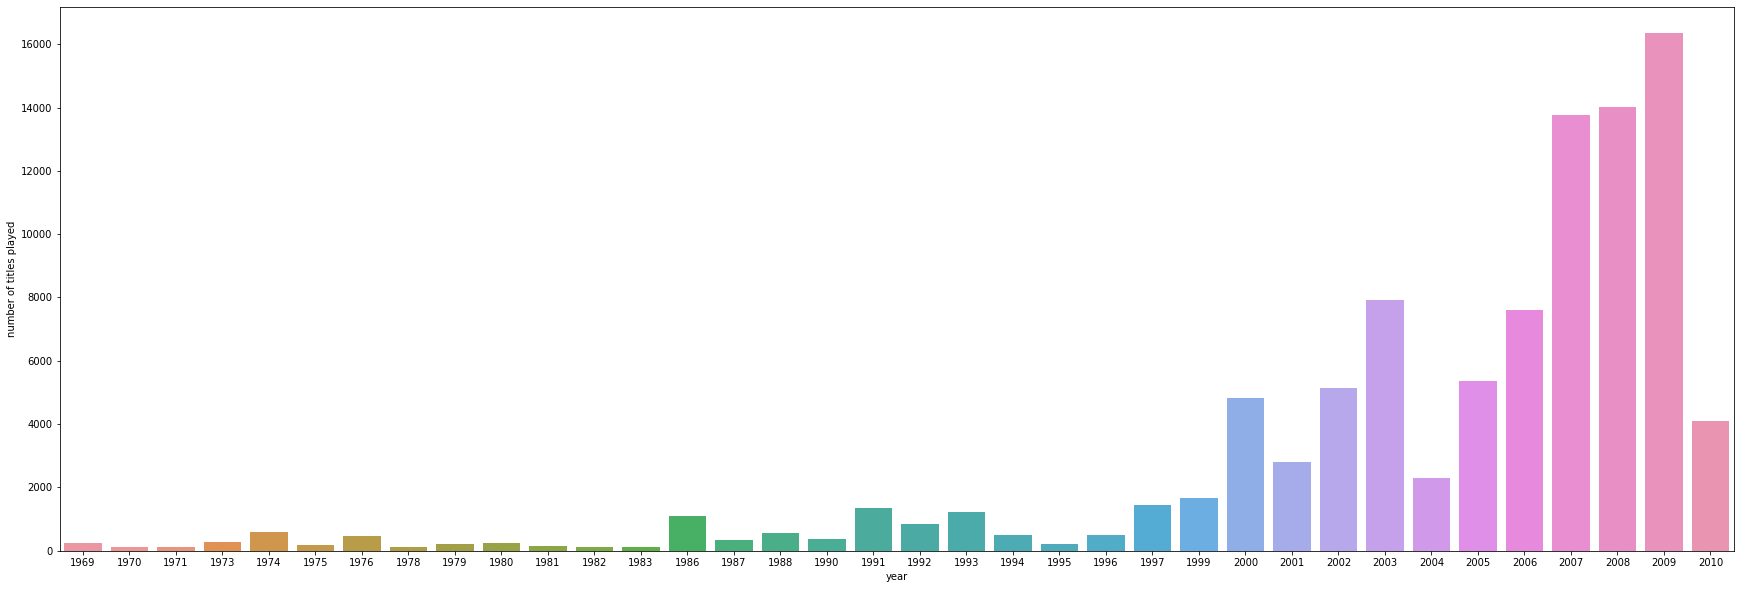

In [25]:
plt.figure(figsize=(30,10))
sns.barplot(x = count.index,
            y = 'title',
            data = count,
            estimator = np.median)
plt.ylabel('number of titles played') 
# Show the plot
plt.show()

#### **Observações e Insights:**
- Podemos observar que o número de músicas lançadas em um ano vem aumentando ao longo dos anos.
- De acordo com os dados, o **maior** número de músicas foi lançado em **2009** ou seja, 17,960
- Há uma **diminuição** no número de músicas lançadas em **2010**. Como 2010 é o último ano, a diminuição pode ser porque temos apenas dados parciais do ano de 2010.

## **Abordagem proposta:**

- **Possíveis tecnicas** - Podemos explorar filtragem colaborativa baseada em popularidade e similaridade (usuário-usuário e item-item) e fatoração de matrizes.
- **Desenho da solução:**
  - Explorar os dados e obter informações importantes
  - Aplicar as cinco técnicas acima mencionadas e obter recomendações
  - Avaliando-o na métrica de pontuação F_1
  - Obtendo a melhor técnica
  - Resumo dos benefícios potenciais
  - Recomendação para implementação

- **A fórmula do sucesso** - Usaremos a pontuação F_1 para calcular a eficácia do sistema de recomendação.

**Agora que exploramos os dados, vamos aplicar diferentes algoritmos para construir sistemas de recomendação**

## **Sistemas de recomendação baseados em popularidade**

**Modelo 1: Criação de sistema de recomendação baseado em classificação**

Os sistemas de recomendação baseados em classificação fornecem recomendações com base nas músicas mais populares. Este tipo de sistema de recomendação é útil quando temos problemas de **cold start**. Cold start refere-se ao problema quando colocamos um novo usuário no sistema e a máquina não consegue recomendar músicas para o novo usuário, pois o usuário não teve nenhuma interação histórica no conjunto de dados. Nesses casos, podemos usar um sistema de recomendação baseado em classificação para recomendar músicas ao novo usuário.

Para criar o sistema de recomendação baseado em classificação, pegamos a **média** de todas os play_counts fornecidos para cada música e as classificamos com base em suas contagens médias de play_counts.

In [26]:
# Calculating average play_count
average_count = df_final.groupby('song_id').mean()['play_count']

# Calculating the frequency a song is played.
play_freq = df_final.groupby('song_id').count()['play_count']

# Making a dataframe with the average_count and play_freq
final_play = pd.DataFrame({'avg_count':average_count, 'play_freq':play_freq})

Agora, vamos criar uma função para encontrar as **principais músicas** para uma recomendação com base na contagem média de reprodução da música. Também podemos adicionar um **limite para um número mínimo de contagens de reproduções** para que uma música possa ser considerada para recomendação.

In [27]:
def top_n_songs(data, n, min_interactions=100):
    
    # Finding songs with minimum number of play counts
    recommendations = data[data['play_freq'] >= min_interactions]
    
    # Sorting values w.r.t average count 
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)
    
    return recommendations.index[:n]

Podemos **usar esta função com diferentes n's e interações mínimas** para que as músicas sejam recomendadas.

**Recomendando as 10 melhores músicas com 100 interações mínimas com base na popularidade**

In [28]:
list(top_n_songs(final_play, 10, 100))

[7224, 6450, 9942, 5531, 5653, 8483, 2220, 657, 614, 352]

## **Sistema de recomendação baseado em filtragem colaborativa**

Nesse tipo de sistema de recomendação, `não precisamos de nenhuma informação` sobre os usuários ou músicas. Precisamos apenas dos dados de interação do item do usuário para construir um sistema de recomendação colaborativo. Por exemplo -
<ol>
    <li><b>Avaliações</b> fornecido pelos usuários. Por exemplo - avaliações de livros no goodread, avaliações de filmes no imdb etc</li>
    <li><b>Likes</b> de usuários em diferentes postagens do facebook, curtidas em vídeos do youtube</li>
    <li><b>Usar/comprar</b> de um produto pelos usuários. Por exemplo - comprar itens diferentes em sites de comércio eletrônico</li>
    <li><b>Ler</b> de artigos de leitores em vários blogs</li>
</ol>

#### Tipos de Filtragem Colaborativa

- Baseado em similaridade/vizinhança
 * Usuário Baseado na Similaridade do Usuário
 * Item Com base na similaridade do item

#### Construindo um sistema de recomendação baseado em similaridade de usuário de linha de base

- Abaixo, estamos construindo **sistemas de recomendação baseados em similaridade** usando a similaridade `Pearson` e usando **KNN para encontrar usuários semelhantes** que são os vizinhos mais próximos do usuário em questão.
- Estaremos usando uma nova biblioteca - `surpresa` para construir os modelos restantes, vamos primeiro importar as classes e funções necessárias desta biblioteca
- Por favor, use o seguinte código para `instalar a biblioteca surpresa`. Você só faz isso **uma vez** ao executar o código pela primeira vez.

**!pip install surpresa**

In [29]:
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing play_counts, data should be in structure - user; item ; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the data in train and test dataset
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold


# For implementing clustering based recommendation system
from surprise import CoClustering

**Antes de construir os sistemas de recomendação, vamos revisar algumas terminologias básicas que vamos usar:**

**Músicas relevantes** - Uma música que é realmente **tocada acima do limite (aqui 1.5)** é relevante, se o **play_count real estiver abaixo do limite, então música não é relevante**.

**Música recomendada** - Uma música que **play_count previsto é maior que o limite (aqui 1.5) é uma música recomendada**, se a **play_count previsto estiver abaixo do limite, essa música não será recomendada ao usuário**.

**Falso Negativo (FN)** - É a **frequência de músicas relevantes que não são recomendadas ao usuário**. Se as músicas relevantes não forem recomendadas ao usuário, o usuário pode não ouvir a música. Isso resultaria na **perda de oportunidade para o provedor de serviços** que eles gostariam de minimizar.

**Falso Positivo (FP)** - É a **frequência de músicas recomendadas que na verdade não são relevantes**. Nesse caso, o sistema de recomendação não está fazendo um bom trabalho em encontrar e recomendar as músicas relevantes para o usuário. Isso resultaria em **perda de recursos para o provedor de serviços** que eles também gostariam de minimizar.

**Recall** - É a **fração de músicas realmente relevantes que são recomendadas ao usuário** ou seja, se de 10 músicas relevantes, 6 são recomendadas ao usuário, então a rechamada é 0.60. Quanto maior o valor de recall melhor é o modelo. É uma das métricas para fazer a avaliação de desempenho dos modelos de classificação.

**Precisão** - É a **fração de músicas recomendadas que são realmente relevantes** ou seja, se de 10 itens recomendados, 6 forem considerados relevantes pelo usuário, a precisão será 0.60. Quanto maior o valor da precisão melhor é o modelo. É uma das métricas para fazer a avaliação de desempenho dos modelos de classificação.

### **Precision@k, Recall@k e F1-score@k**

**Precision@k** - É a **fração de músicas recomendadas que são relevantes nas previsões do `top k`**. O valor de k é o número de recomendações a serem fornecidas ao usuário. Pode-se escolher um número variável de recomendações a serem dadas a um único usuário.

**Recall@k** - É a **fração de músicas relevantes que são recomendadas ao usuário nas previsões do `top k`**.

**F1-Score@k** - É a **média harmônica de Precision@k e Recall@k**. Quando **precision@k e recall@k parecem ser importantes** então é útil usar essa métrica porque ela é representativa de ambas.

### **Algumas funções úteis**

- A função abaixo toma o **modelo de recomendação** como entrada e fornece a **precision@k e recall@k** para esse modelo.
- Para calcular **precisão e rechamada**, as previsões **top k** são levadas em consideração para cada usuário.

In [31]:
def precision_recall_at_k(model, k=30, threshold=1.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions=model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key=lambda x: x[0], reverse=True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0.

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0.

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)),3)
    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)),3)
    
    accuracy.rmse(predictions)
    print('Precision: ', precision) # Command to print the overall precision
    print('Recall: ', recall) # Command to print the overall recall
    print('F_1 score: ', round((2*precision*recall)/(precision+recall),3)) # Formula to compute the F-1 score.

- Para calcular **precisão e recuperação**, um **limite de 1.5 e valor k de 30 é considerado para as contagens de jogadas recomendadas e relevantes**.
- A intuição do limite 1.5 é que, se a previsão de que um usuário ouvirá a música mais de 1.5 vezes (pode ser entendido 2 de 3 se um valor não inteiro estiver ficando difícil de interpretar), essa música deve ser recomendada para esse usuário.
- No **presente caso, a precisão e o recall precisam ser otimizadas, pois o provedor de serviços gostaria de minimizar ambas as perdas discutidas** acima. Portanto, a medida de desempenho correta é a **pontuação F_1**.

Abaixo, estamos convertendo o **dataset**, que é um **pandas dataframe**, em um **formato diferente chamado `surprise.dataset.DatasetAutoFolds`**. Isso é exigido pela biblioteca surpresa. Para isso, estaremos **utilizando as classes `Reader` e `Dataset`**.

In [32]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(0, 5))

# Loading the dataset
data = Dataset.load_from_df(df_final[['user_id', 'song_id', 'play_count']], reader)

# Splitting the data into train and test dataset
trainset, testset = train_test_split(data, test_size=0.40, random_state=42)

- Agora estamos **prontos para construir o primeiro sistema de recomendação baseado em similaridade de linha de base** usando a similaridade de cosseno.
- **KNNBasic** é um algoritmo que também está **associado ao pacote surpresa**, é usado para encontrar as **músicas semelhantes desejadas entre um determinado conjunto de músicas**.

In [33]:
# Declaring the similarity options.
sim_options = {'name': 'cosine',
               'user_based': True}

# KNN algorithm is used to find desired similar items.
sim_user_user = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_user_user.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_user_user)

RMSE: 1.0878
Precision:  0.396
Recall:  0.692
F_1 score:  0.504


**Observações:**
- Calculamos **RMSE** para verificar **quão distantes as contagens gerais de jogadas previstas** estão das **contagens de jogadas reais**.
- Intuição de Recall - Estamos obtendo um **recall de quase 0.70**, o que significa que de **todas as músicas relevantes, 70% são recomendadas**.
- Intuição de Precisão - Estamos obtendo uma **precisão de quase 0.396**, o que significa **de todas as músicas recomendadas, 39.6% são relevantes**.
- Aqui **pontuação F_1** do **modelo de linha de base é quase 0.504**. Indica que **as músicas mais recomendadas eram relevantes e músicas relevantes foram recomendadas**. Tentaremos melhorar isso mais tarde usando **GridSearchCV ajustando diferentes hiperparâmetros** deste algoritmo.

Vamos agora **prever play_counts para um usuário com `user_id=6958` e `song_id=1671`** como mostrado abaixo.

In [34]:
# Predicting play_count for a sample user with a listened song.
sim_user_user.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.80   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.8009387435128914, details={'actual_k': 40, 'was_impossible': False})

- A saída acima mostra que **o play_count real para este par usuário-item é 2 e a prevista é 1.80** por este **modelo de linha de base baseado em semelhança de usuário-usuário**.

Abaixo, estamos **prevendo play_count para o mesmo `userId=6958`, mas para uma música que este usuário ainda não ouviu, ou seja, `song_id=3232`**

In [35]:
#predicting play_count for a sample user with a song not-listened by the user.
sim_user_user.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.64   {'actual_k': 40, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6386860897998294, details={'actual_k': 40, 'was_impossible': False})

- Como podemos ver, o **play_count previsto para este par usuário-item é 1.64** com base neste modelo de linha de base baseado em semelhança de usuário-usuário.

### **Melhorando o sistema de recomendação baseado em similaridade ajustando seus hiperparâmetros**

Abaixo estaremos ajustando hiperparâmetros para os algoritmos `KNNBasic`. Vamos tentar entender alguns dos hiperparâmetros do algoritmo KNNBasic:

- **k** (int) – O número (máximo) de vizinhos a serem considerados para agregação. O padrão é 40.
- **min_k** (int) – O número mínimo de vizinhos a serem considerados para agregação. Se não houver vizinhos suficientes, a previsão é definida como a média global de todas os play_counts. O padrão é 1.
- **sim_options** (dict) – Um dicionário de opções para a medida de similaridade. E há quatro medidas de similaridade disponíveis na surpresa -
    - cosseno
    - msd (padrão)
    -Pearson
    - linha de base de Pearson

In [36]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [True], "min_support":[2,4]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0468251144965646
{'k': 30, 'min_k': 9, 'sim_options': {'name': 'pearson_baseline', 'user_based': True, 'min_support': 2}}


Assim que a pesquisa da grade estiver **completa**, podemos obter os **valores ideais para cada um desses hiperparâmetros** conforme mostrado acima

Agora vamos construir o **modelo final usando valores ajustados dos hiperparâmetros** que recebemos usando **grid search cross-validation**

In [37]:
# Using the optimal similarity measure for user-user based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': True, "min_support":2}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=9, random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_user_user_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =30.
precision_recall_at_k(sim_user_user_optimized)

RMSE: 1.0521
Precision:  0.413
Recall:  0.721
F_1 score:  0.525


- Podemos ver acima que depois de ajustar os hiperparâmetros, **a pontuação F_1 do modelo ajustado é melhor do que o modelo de linha de base.** Junto com isso **o RMSE do modelo caiu em comparação com o modelo antes do ajuste do hiperparâmetro**. Portanto, podemos dizer que o desempenho do modelo melhorou após o ajuste de hiperparâmetros.

Vamos agora **prever play_count para um usuário com `userId`="6958" e song_id=1671 com o modelo otimizado conforme mostrado abaixo**

In [38]:
sim_user_user_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 24, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.962926073914969, details={'actual_k': 24, 'was_impossible': False})

- Aqui o modelo fornece uma **boa previsão** em comparação com o play_count(2) real.

Abaixo, estamos prevendo o play_count para o mesmo **`userId="6958"`**, mas para uma música que este usuário **não ouviu antes** ou seja, `song_id=3232`, usando o **modelo otimizado** conforme mostrado abaixo -

In [39]:
sim_user_user_optimized.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.45   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4516261428486725, details={'actual_k': 10, 'was_impossible': False})

### **Identificando usuários semelhantes a um determinado usuário (vizinhos mais próximos)**

Também podemos descobrir **usuários semelhantes a um determinado usuário** ou seus **vizinhos mais próximos** com base neste algoritmo KNNBasic. Abaixo, encontramos os 5 usuários mais semelhantes ao primeiro usuário da lista com id interno 0, com base na métrica de distância `msd`

In [40]:
sim_user_user_optimized.get_neighbors(0,5) # Here 0 is the inner id of the above user.

[42, 1131, 17, 186, 249]

### **Implementação do algoritmo de recomendação baseado no modelo KNNBasic otimizado**

Abaixo estaremos implementando uma função onde os parâmetros de entrada são -

- dados: um conjunto de dados **música**
- user_id: um id de usuário **contra o qual queremos as recomendações**
- top_n: o **número de músicas que queremos recomendar**
- algo: o algoritmo que queremos usar **para prever o play_count**
- A saída da função é um **conjunto de top_n itens** recomendado para o determinado user_id com base no algoritmo fornecido

In [41]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended songs ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='play_count')
    
    # Extracting those songs ids which the user_id has not visited yet
    non_interacted_songs = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the song ids which user_id has not interacted yet
    for item_id in non_interacted_songs:
        
        # Predicting the ratings for those non-interacted song  ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n] # returing top n highest predicted rating songs for this user

**Previsão das 5 melhores músicas para userId=6958 com sistema de recomendação baseado em user_user_similarity**

In [42]:
# Making top 5 recommendations for user_id 6958 with a similarity-based recommendation engine.
recommendations = get_recommendations(df_final,6958, 5, sim_user_user)

In [43]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_ratings"
pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings'])

,song_id,predicted_ratings
0,7224,3.141147
1,614,2.525000
2,5653,2.514023
3,352,2.425000
4,6450,2.394927


### **Corrigindo o play_counts e classificando as músicas acima**

Ao comparar as contagens de reprodução de duas músicas, não são apenas os **play_counts** que descrevem a **probabilidade do usuário para esse produto**. Junto com a play_count também é importante levar em consideração o **número de usuários que ouviram aquela música**. Devido a isso, calculamos os **"corrected_ratings"**para cada música. Normalmente, quanto maior o**"play_count" de um produto, mais ele é apreciado pelos usuários**. Para interpretar o conceito acima, uma **música com play_count 4 com rating_count 3 é menos apreciada em comparação com uma música com play_count 3 com rating_count de 50**. Foi**encontrado empiricamente que a verossimilhança do produto é diretamente proporcional ao inverso da raiz quadrada do rating_count do produto**.

In [44]:
def ranking_songs(recommendations, final_rating):
  # sort the songs based on play counts
  ranked_songs = final_rating.loc[[items[0] for items in recommendations]].sort_values('play_freq', ascending=False)[['play_freq']].reset_index()

  # merge with the recommended songs to get predicted play_count
  ranked_songs = ranked_songs.merge(pd.DataFrame(recommendations, columns=['song_id', 'predicted_ratings']), on='song_id', how='inner')

  # rank the songs based on corrected play_counts
  ranked_songs['corrected_ratings'] = ranked_songs['predicted_ratings'] - 1 / np.sqrt(ranked_songs['play_freq'])

  # sort the songs based on corrected play_counts
  ranked_songs = ranked_songs.sort_values('corrected_ratings', ascending=False)
  
  return ranked_songs

In [45]:
# Applying the ranking_songs function and sorting it based on corrected play_counts. 
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,7224,107,3.141147,3.044473
1,614,373,2.525000,2.473222
2,5653,108,2.514023,2.417798
0,352,748,2.425000,2.388436
4,6450,102,2.394927,2.295913


### **Sistemas de recomendação de filtragem colaborativa baseada em similaridade de item**

* Acima, vimos **filtragem colaborativa baseada em similaridade** onde a similaridade foi observada **entre usuários**. Agora, vamos examinar a filtragem colaborativa baseada em similaridade, onde a similaridade é vista **entre as músicas**.

In [46]:
#Declaring the similarity options.
sim_options = {'name': 'pearson',
               'user_based': False}

#KNN algorithm is used to find desired similar items.
sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Train the algorithm on the trainset, and predict play_count for the testset
sim_item_item.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k =30.
precision_recall_at_k(sim_item_item)

RMSE: 1.0588
Precision:  0.376
Recall:  0.538
F_1 score:  0.443


- O modelo de linha de base está dando uma boa pontuação F_1. Tentaremos **melhorar isso mais tarde usando GridSearchCV** ajustando diferentes hiperparâmetros deste algoritmo.

Vamos agora **prever o play_count para um usuário com `userId=6958` e `song_id=1671`** como mostrado abaixo. Aqui o usuário já ouviu a música com song_id 1671.

In [47]:
# Predicting rating for a sample user with a listened song. 
sim_item_item.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.92   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.91669781984001, details={'actual_k': 10, 'was_impossible': False})

- A saída acima mostra que o modelo baseado em **semelhança item-item** está fazendo uma **boa previsão** onde o play_count real é 2.

Abaixo, estamos **prevendo o play_count para o mesmo userId=6958, mas para uma música que este usuário ainda não ouviu, ou seja, `song_id=3232`**

In [48]:
# Predicting play count for a sample user with song not heard by the user.
sim_item_item.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.00   {'actual_k': 5, 'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.0, details={'actual_k': 5, 'was_impossible': False})

Como podemos ver, o **play_count previsto para este par de música do usuário é baixo** com base neste **modelo de linha de base baseado em similaridade item-item**.

### **Melhorando o sistema de recomendação baseado em similaridade ajustando seus hiperparâmetros**

Abaixo estaremos **ajustando hiperparâmetros para os algoritmos `KNNBasic`**. Vamos tentar entender **alguns dos hiperparâmetros** do algoritmo KNNBasic:

- **k** (int) – O número (máximo) de vizinhos a serem considerados para agregação. O padrão é 40.
- **min_k** (int) – O número mínimo de vizinhos a serem considerados para agregação. Se não houver vizinhos suficientes, a previsão é definida como a média global de todas as play_counts. O padrão é 1.
- **sim_options** (dict) – Um dicionário de opções para a medida de similaridade. E há quatro medidas de similaridade disponíveis na surpresa -
    - cosseno
    - msd (padrão)
    -Pearson
    - linha de base de Pearson

In [49]:
# Setting up parameter grid to tune the hyperparameters
param_grid = {'k': [10, 20, 30], 'min_k': [3, 6, 9],
              'sim_options': {'name': ["cosine",'pearson',"pearson_baseline"],
                              'user_based': [False], "min_support":[2,4]}
              }

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0261633813675823
{'k': 30, 'min_k': 6, 'sim_options': {'name': 'pearson_baseline', 'user_based': False, 'min_support': 2}}


Assim que a **pesquisa da grade** estiver concluída, podemos obter os **valores ideais para cada um desses hiperparâmetros, conforme mostrado acima**

Agora vamos construir o **modelo final** usando **valores ajustados dos hiperparâmetros** que recebemos usando validação cruzada de pesquisa de grade

In [50]:
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'user_based': False, "min_support":4}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, k=30, min_k=6, random_state=1, verbose=False)

# Training the algorithm on the trainset
sim_item_item_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =10.
precision_recall_at_k(sim_item_item_optimized)

RMSE: 1.0328
Precision:  0.405
Recall:  0.696
F_1 score:  0.512


- Podemos ver acima que depois de ajustar os hiperparâmetros, **F_1 score do modelo ajustado é muito melhor do que o modelo de linha de base**. Além disso, há uma queda considerável no valor do RMSE com o ajuste. Portanto, o modelo ajustado está se saindo melhor do que o anterior.

Vamos agora prever **play_count para um usuário com `userId=6958` e para `songs_id=1671`** com o **modelo otimizado** conforme mostrado abaixo

In [51]:
sim_item_item_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.96   {'actual_k': 10, 'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.9634957386781853, details={'actual_k': 10, 'was_impossible': False})

- Aqui, o modelo otimizado está prevendo um play_count muito bom (quase **1.96**) para o produto cujo play_count real é 2.

Abaixo, estamos **prevendo play_count** para o mesmo **`userId=6958`**, mas para uma música que este usuário **não ouviu antes** ou seja, `songs_id==3232`, usando o modelo otimizado conforme mostrado abaixo -

In [52]:
sim_item_item_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.70   {'was_impossible': True, 'reason': 'Not enough neighbors.'}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.6989607635206787, details={'was_impossible': True, 'reason': 'Not enough neighbors.'})

- Para um produto desconhecido, o modelo está prevendo um play_count de **1.70**.

#### **Identificando itens semelhantes a um determinado item (vizinhos mais próximos)**

Também podemos descobrir **itens semelhantes** a um determinado item ou seus vizinhos mais próximos com base neste **algoritmo KNNBasic**. Abaixo, encontramos os 5 itens mais semelhantes ao item com id interno 0 com base na métrica de distância `msd`

In [53]:
sim_item_item_optimized.get_neighbors(0, k=5)

[124, 523, 173, 205, 65]

**Previsão dos 5 principais produtos para userId=6958 com sistema de recomendação baseado em similaridade**

In [54]:
# Making top 5 recommendations for user_id 6958 with similarity-based recommendation engine.
recommendations = get_recommendations(df_final, 6958, 5, sim_item_item)

In [55]:
# Building the dataframe for above recommendations with columns "song_id" and "predicted_play_count"
pd.DataFrame(recommendations, columns=['songs_id', 'predicted_play_count'])

,songs_id,predicted_play_count
0,750,5.000000
1,4377,4.206578
2,139,3.875420
3,5616,3.868549
4,861,3.840408


In [56]:
# Applying the ranking_songs function and sorting it based on corrected play_counts. 
ranking_songs(recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,750,123,5.000000,4.909833
0,4377,159,4.206578,4.127273
3,139,119,3.875420,3.783750
4,5616,113,3.868549,3.774477
1,861,126,3.840408,3.751321


* Agora, como vimos **algoritmos de filtragem colaborativa baseados em similaridade**, vamos agora entrar em **algoritmos de filtragem colaborativa baseados em modelo**.

## **Filtragem Colaborativa Baseada em Modelo - Fatoração de Matrizes**

A Filtragem Colaborativa Baseada em Modelo é um **sistema de recomendação personalizado**, as recomendações são baseadas no comportamento passado do usuário e não dependem de nenhuma informação adicional. Usamos **recursos latentes** para encontrar recomendações para cada usuário.

### **Decomposição em valores singulares (SVD)**

SVD é usado para **calcular os recursos latentes** da **matriz de música do usuário**. Mas o SVD não funciona quando **omitimos valores** na **matriz de itens do usuário**.

**Construindo um sistema de recomendação de fatoração de matriz de linha de base**

In [57]:
# Using SVD matrix factorization
svd = SVD(random_state=1)

# Training the algorithm on the trainset
svd.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(svd)

RMSE: 1.0252
Precision:  0.41
Recall:  0.633
F_1 score:  0.498


- O modelo de linha de base com o algoritmo está dando uma boa pontuação F-1 (quase **49.86%**). Indica um bom desempenho do modelo. O RMSE do modelo é 1.0252.

Vamos agora prever a play_counts de um usuário com **`userId="6958"`** e **`song_id=1671`** conforme mostrado abaixo. Aqui o usuário já ouviu a música.

In [58]:
# Making prediction.
svd.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.27   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.267473397214638, details={'was_impossible': False})

- Como podemos ver - **o play_counts** real para este par usuário-música é 2 e o play_count previsto é **1.27** por esta matriz **modelo de linha de base baseado em fatoração**.
- Parece que subestimamos o play_counts. Tentaremos consertar isso mais tarde **ajustando os hiperparâmetros** do modelo usando GridSearchCV

Abaixo, estamos prevendo play_count para o mesmo `userId=6958`, mas para uma música que este usuário não ouviu antes, ou seja, `song_id=3232`, conforme mostrado abaixo

In [59]:
# Making prediction. 
svd.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.56   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.5561675084403663, details={'was_impossible': False})

- Podemos ver que o **play_count estimado** para este **par usuário-música** é 1.98 com base neste **modelo de linha de base baseado em fatoração de matriz**

### **Melhorando o sistema de recomendação baseado em fatoração de matrizes ajustando seus hiperparâmetros**

Em SVD, play_count é previsto como -

$$\hat{r}_{u i}=\mu+b_{u}+b_{i}+q_{i}^{T} p_{u}$$

Se o usuário $u$ for desconhecido, o bias $b_{u}$ e os fatores $p_{u}$ serão considerados zero. O mesmo se aplica ao item $i$ com $b_{i}$ e $q_{i}$.

Para estimar todas as incógnitas, minimizamos o seguinte erro quadrado regularizado:

$$\sum_{r_{u i} \in R_{\text {train }}}\left(r_{u i}-\hat{r}_{u i}\right)^{2}+\lambda\left(b_{i}^{2}+b_{u}^{2}+\left\|q_{i}\right\|^{2}+\left\|p_{u}\right\|^{2}\right)$$

A minimização é realizada por uma **descida de gradiente estocástico** muito direta:

$$\begin{aligned} b_{u} & \leftarrow b_{u}+\gamma\left(e_{u i}-\lambda b_{u}\right) \\ b_{i} & \leftarrow b_{i}+\gamma\left(e_{u i}-\lambda b_{i}\right) \\ p_{u} & \leftarrow p_{u}+\gamma\left(e_{u i} \cdot q_{i}-\lambda p_{u}\right) \\ q_{i} & \leftarrow q_{i}+\gamma\left(e_{u i} \cdot p_{u}-\lambda q_{i}\right) \end{aligned}$$

Existem muitos hiperparâmetros para ajustar neste algoritmo, você pode encontrar uma lista completa de hiperparâmetros [aqui](https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD)

Abaixo estaremos ajustando apenas três hiperparâmetros -
- **n_epochs**: O número de iterações do algoritmo SGD
- **lr_all**: A taxa de aprendizado para todos os parâmetros
- **reg_all**: O termo de regularização para todos os parâmetros

In [60]:
# Set the parameter space to tune
param_grid = {'n_epochs': [10, 20, 30], 'lr_all': [0.001, 0.005, 0.01],
              'reg_all': [0.2, 0.4, 0.6]}

# Performing 3-fold gridsearch cross validation
gs_ = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs_.fit(data)

# Best RMSE score
print(gs_.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs_.best_params['rmse'])

1.0120497706186118
{'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.2}


Assim que a **pesquisa de grade** estiver concluída, podemos obter os **valores ideais** para cada um desses hiperparâmetros, conforme mostrado acima

Agora vamos **construir o modelo final** usando **valores ajustados** dos hiperparâmetros que recebemos usando validação cruzada de pesquisa de grade

In [61]:
# Building the optimized SVD model using optimal hyperparameter search
svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Training the algorithm on the trainset
svd_optimized=svd_optimized.fit(trainset)

# Let us compute precision@k and recall@k also with k =30.
precision_recall_at_k(svd_optimized)

RMSE: 1.0141
Precision:  0.415
Recall:  0.635
F_1 score:  0.502


- Podemos ver acima que o **modelo ajustado** está mostrando uma pontuação F_1 um pouco melhor e também um crescimento muito leve no modelo. Portanto, o modelo ajustado está se saindo melhor do que o modelo anterior.

Vamos agora prever o play_count para um usuário com `userId=6958` e `song_id=1671` com o modelo otimizado conforme mostrado abaixo

In [62]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 1671.
svd_optimized.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.34   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.3432395286125096, details={'was_impossible': False})

- Aqui, o play_count previsto é **1.34** para uma música cujo play_count real é **2**.

Abaixo, estamos prevendo play_count para o mesmo `userId=6958`, mas para uma música que este usuário não ouviu antes, ou seja, `song_id=3232`, conforme mostrado abaixo

In [63]:
# Using svd_algo_optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
svd_optimized.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.44   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.442548446117648, details={'was_impossible': False})

- Para uma música não vista, o play_count fornecido pelo modelo otimizado é **1.44**.

**Previsão das 5 melhores músicas para userId=6958 com sistema de recomendação baseado em svd_optimized**

In [64]:
# Getting top 5 recommendations for user_id 6958 using "svd_optimized" algorithm.
svd_recommendations = get_recommendations(df_final, 6958, 5, svd_optimized)

In [78]:
# Ranking songs based on above recommendations
ranking_songs(svd_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
2,7224,107,2.601899,2.505225
1,5653,108,2.108728,2.012502
4,8324,96,2.014091,1.912029
0,9942,150,1.940115,1.858465
3,6450,102,1.952493,1.853478


## **Sistema de recomendação baseado em cluster**

Em **sistemas de recomendação baseados em cluster**, exploramos as **semelhanças e diferenças** nos gostos das pessoas em restaurantes com base em como avaliam diferentes restaurantes. Agrupamos usuários semelhantes e recomendamos restaurantes a um usuário com base nas avaliações de outros usuários no mesmo cluster.

- **Co-clustering** é um conjunto de técnicas em **Análise de Cluster**. Dada alguma **matriz A, queremos agrupar linhas de A e colunas de A simultaneamente**, esta é uma tarefa comum para matrizes de item de usuário.

- Como agrupa as linhas e colunas simultaneamente, também é chamado de **bi-clustering**. Para entender o funcionamento do algoritmo, deixe A ser a matriz m x n, o objetivo é gerar co-clusters: um subconjunto de linhas que exibem comportamento semelhante em um subconjunto de colunas ou vice-versa.

- O co-clustering é definido como duas funções de mapa:
linhas -> índices de cluster de linha
colunas -> índices de cluster de coluna
Essas funções de mapa são aprendidas simultaneamente. É **diferente de outras técnicas de clustering** onde agrupamos **primeiro as linhas e depois as colunas**.

In [66]:
# Using CoClustering algorithm.
clust_baseline = CoClustering(random_state=1)

# Training the algorithm on the trainset
clust_baseline.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(clust_baseline)

RMSE: 1.0487
Precision:  0.397
Recall:  0.582
F_1 score:  0.472


- Aqui **pontuação F_1** do **modelo de linha de base é quase 0.472**. Indica que **as músicas mais recomendadas eram relevantes e músicas relevantes foram recomendadas**. Tentaremos melhorar isso mais tarde usando **GridSearchCV ajustando diferentes hiperparâmetros** deste algoritmo.

Vamos agora **prever play_counts para um usuário com `user_id=6958` e `song_id=1671`** como mostrado abaixo. Aqui o usuário já ouviu a música.

In [67]:
# Making prediction for user_id 6958 and song_id 1671.
clust_baseline.predict(6958,1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.29   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.2941824757363074, details={'was_impossible': False})

Como podemos ver - o **play_count real** para este **par usuário-música é 2** e o **play_count previsto é 1.29 por este modelo de linha de base baseado em co-clustering**. Parece que subestimamos o play_count por uma pequena margem. Tentaremos corrigir isso posteriormente ajustando os hiperparâmetros do modelo usando GridSearchCV

Abaixo, estamos prevendo play_count para o mesmo `userId=6958`, mas para uma música que este usuário não ouviu antes, ou seja, `song_id=3232`, conforme mostrado abaixo -

In [68]:
# Making prediction for userid 6958 and song_id 3232.
clust_baseline.predict(6958,3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.48   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.4785259100797417, details={'was_impossible': False})

- Podemos ver que **estimated play_count** para este par de usuário-música é 1.48 com base neste modelo de linha de base baseado em Co-clustering.

### **Melhorando o sistema de recomendação baseado em clustering ajustando seus hiperparâmetros**

Abaixo estaremos ajustando hiperparâmetros para os algoritmos `CoClustering`. Vamos tentar entender diferentes hiperparâmetros deste algoritmo -

- **n_cltr_u** (int) – Número de **clusters de usuários**. O padrão é 3.
- **n_cltr_i** (int) – Número de **grupos de itens**. O padrão é 3.
- **n_epochs** (int) – Número de **iteração do loop de otimização**. O padrão é 20.
- **random_state** (int, RandomState instância do NumPy, ou None) – Determina o RNG que será usado para inicialização. Se int, random_state será usado como uma semente para um novo RNG. Isso é útil para obter a mesma inicialização em várias chamadas para fit(). Se a instância RandomState, esta mesma instância é usada como RNG. Se Nenhum, o RNG atual do numpy é usado. O padrão é Nenhum.
- **verbose** (bool) – Se True, a época atual será impressa. O padrão é Falso.

In [69]:
# Set the parameter space to tune
param_grid = {'n_cltr_u':[5,6,7,8], 'n_cltr_i': [5,6,7,8], 'n_epochs': [10,20,30]}

# Performing 3-fold gridsearch cross validation
gs = GridSearchCV(CoClustering, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting data
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

1.0590307211086032
{'n_cltr_u': 5, 'n_cltr_i': 5, 'n_epochs': 10}


Assim que a pesquisa da grade estiver **completa**, podemos obter os **valores ideais** para cada um desses hiperparâmetros, conforme mostrado acima

Agora vamos construir o **modelo final** usando valores ajustados dos hiperparâmetros que recebemos usando validação cruzada de pesquisa de grade

In [ ]:
# Using tuned Coclustering algorithm
clust_tuned = CoClustering(n_cltr_u=3,n_cltr_i=2, n_epochs=60, random_state=1)

# Training the algorithm on the trainset
clust_tuned.fit(trainset)

# Let us compute precision@k and recall@k with k =30.
precision_recall_at_k(clust_tuned)

- Podemos ver que a **pontuação F_1 da linha de base** para o **modelo de co-clustering ajustado** no conjunto de teste é **quase igual à pontuação F_1** para o modelo de co-clustering da linha de base. Os dois podem ser considerados quase semelhantes entre si.

- Vamos agora **prever play_count** para um usuário com `userId=6958` e para `song_id=1671` como mostrado abaixo
- Aqui o usuário já ouviu a música.

In [75]:
# Using co_clustering_optimized model to recommend for userId 6958 and song_id 1671.
clust_tuned.predict(6958, 1671, r_ui=2, verbose=True)

user: 6958       item: 1671       r_ui = 2.00   est = 1.59   {'was_impossible': False}


Prediction(uid=6958, iid=1671, r_ui=2, est=1.585941833604144, details={'was_impossible': False})

- O **modelo otimizado previu o play_count como `1.59`**. considerando que o play_count real é `2`.

In [76]:
# Using Co_clustering based optimized model to recommend for userId 6958 and song_id 3232 with unknown baseline rating.
clust_tuned.predict(6958, 3232, verbose=True)

user: 6958       item: 3232       r_ui = None   est = 1.77   {'was_impossible': False}


Prediction(uid=6958, iid=3232, r_ui=None, est=1.7702852679475787, details={'was_impossible': False})

- O **modelo otimizado** previu o play_count como `1.77`.

**Previsão das 5 melhores músicas para userId=6958 usando algoritmo otimizado baseado em co-clustering**

In [ ]:
# Getting top 5 recommendations for user_id 6958 using "Co-clustering based optimized" algorithm.
clustering_recommendations = get_recommendations(df_final, 6958, 5, clust_tuned)

In [77]:
# Ranking songs based on above recommendations
ranking_songs(clustering_recommendations, final_play)

,song_id,play_freq,predicted_ratings,corrected_ratings
3,6450,102,2.626819,2.527805
1,5653,108,2.578936,2.482711
2,7224,107,2.525240,2.428567
0,9942,150,2.506799,2.425149
4,4831,97,2.415542,2.314008


### **Conclusão**

Neste estudo de caso, construímos sistemas de recomendação usando cinco algoritmos diferentes. Eles são os seguintes:
- Baseado em classificação usando médias
- Filtragem colaborativa baseada em similaridade usuário-usuário
- Filtragem colaborativa baseada em similaridade item-item
- Filtragem colaborativa baseada em modelo (fatorização de matrizes)
- Sistemas de recomendação baseados em clustering

Vimos como eles são diferentes uns dos outros e que tipo de dados são necessários para construir cada um desses sistemas de recomendação. Podemos combinar ainda mais todas as técnicas de recomendação que vimos.
 
Para demonstrar **"filtragem colaborativa baseada em semelhança de usuário-usuário","filtragem colaborativa baseada em similaridade de item-item" e "filtragem colaborativa baseada em modelo (fatoração de matrizes)"**, a biblioteca **surpresa** foi demonstrada. Para esses algoritmos, **validação cruzada de pesquisa de grade é usada para encontrar o melhor modelo de trabalho** e, usando isso, as **previsões correspondentes são feitas**.

#### **Proposta para o desenho final da solução:**

Usaremos a solução final do sistema de recomendação de filtragem colaborativa baseada em similaridade usuário-usuário, uma vez que é mais robusta e fornece uma pontuação F_1 alta. Prevemos as contagens de reprodução para todos os usuários que não ouviram uma música específica.